In [58]:
import requests
import re
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as np

In [2]:
url="https://www.cars24.com/buy-used-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1"
url

'https://www.cars24.com/buy-used-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1'

In [3]:
page=requests.get(url)
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, maximum-scale=5, user-scalable=yes" name="viewport"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251029195659/_next/static/css/97bf58c98d86a69c.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251029195659/_next/static/css/d85757e0ccb512f4.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251029195659/_next/static/css/716a3e2b0f4d35b8.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251029195659/_next/static/css/dd4bd16867b1be55.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251029195659/_next/static/css/5f5bb4dc7f7a98a9.css" rel="stylesheet"/><link data-pre

In [5]:
soup.find("div",class_="styles_contentWrap__9oSrl").text


'CARS24 Assured2019 Volkswagen Polo\xa0GT TSI AT62.38k kmPetrolAutoUP-16EMI ₹12,629/m*₹6.67L₹6.46 lakh+ other charges Sector-18, Noida'

In [6]:
 soup.find("div",class_="styles_normalCardWrapper__qDZjq").text

'CARS24 Assured2019 Volkswagen Polo\xa0GT TSI AT62.38k kmPetrolAutoUP-16EMI ₹12,629/m*₹6.67L₹6.46 lakh+ other charges Sector-18, Noida'

In [7]:
for i in soup.find_all("div",class_="styles_normalCardWrapper__qDZjq"):
    t=i.find("div",class_="styles_outer__NTVth").text
    print(t)
    print("--"*100)


2019 Volkswagen Polo GT TSI AT62.38k kmPetrolAutoUP-16EMI ₹12,629/m*₹6.67L₹6.46 lakh+ other charges
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2022 MG ASTOR SHARP 1.5 MT29.47k kmPetrolManualDL-10EMI ₹16,255/m*₹10.33L₹8.54 lakh+ other charges
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2020 KIA SELTOS HTK PLUS 1.5 DIESEL44.31k kmDieselManualHR-10EMI ₹16,861/m*₹10.11L₹7.58 lakh+ other charges
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
2023 Tata PUNCH PURE MT33.21k kmPetrolManualDL-5CEMI ₹8,016/m*₹5.14L₹4.10 lakh+ other char

In [30]:
 for i in soup.find_all("div",class_="styles_outer__NTVth"):
     t=i.find('span',class_='sc-braxZu kjFjan').text
     print(t)
     

AttributeError: 'NoneType' object has no attribute 'text'

In [11]:
year=[]
for i in soup.find_all("div",class_="styles_outer__NTVth"):
    t=i.text
    print(t)
    regex=re.findall(r"(\d{4})",t)
    print(regex)
    if regex:
        year.append(regex[0])
    else:
        year.append(np.nan)
    

2020 KIA SELTOS HTK PLUS 1.5 DIESEL44.31k kmDieselManualHR-10EMI ₹16,861/m*₹10.11L₹7.58 lakh+ other charges
['2020']
2024 Hyundai Creta SX (O) IVT 1.5 PETROL29.03k kmPetrolAutoHR-98EMI ₹31,692/m*₹17.30L₹16.65 lakh+ other charges
['2024']
2021 Skoda KUSHAQ ACTIVE 1.0L TSI MT53.00k kmPetrolManualDL-10EMI ₹12,958/m*₹7.14L₹6.63 lakh+ other charges
['2021']
2021 MG HECTOR SHARP 1.5 DCT PETROL36.02k kmPetrolAutoDL-12EMI ₹18,897/m*₹12.00L₹9.93 lakh+ other charges
['2021']
2022 MG ASTOR SHARP 1.5 MT29.47k kmPetrolManualDL-10EMI ₹16,255/m*₹10.33L₹8.54 lakh+ other charges
['2022']
2016 Hyundai Elite i20 MAGNA 1.257.97k kmPetrolManualHR-26EMI ₹6,784/m*₹3.85L₹3.47 lakh+ other charges
['2016']
2018 Renault Duster RXS PETROL40.62k kmPetrolManualDL-9CEMI ₹7,664/m*₹4.26L₹3.92 lakh+ other charges
['2018']
2023 Tata PUNCH PURE MT33.21k kmPetrolManualDL-5CEMI ₹8,016/m*₹5.14L₹4.10 lakh+ other charges
['2023']
2019 Renault Duster RXS OPT CVT72.62k kmPetrolAutoUP-14EMI ₹9,189/m*₹5.30L₹4.70 lakh+ other charg

In [12]:
year

['2020',
 '2024',
 '2021',
 '2021',
 '2022',
 '2016',
 '2018',
 '2023',
 '2019',
 '2024',
 '2019',
 '2023',
 '2024',
 '2024',
 '2022',
 '2021',
 '2021',
 '2021',
 '2019',
 '2022']

In [13]:
len(year)

20

In [33]:
car_modelname=[]
for i in soup.find_all("div",class_="styles_outer__NTVth"):
    t=i.text
    #print(t)
    regex=" ".join(re.findall(r"[A-Za-z]+",t))
    print(regex)
    if regex:
        car_modelname.append(regex)
    else:
        car_modelname.append(np.nan)
    

KIA SELTOS HTK PLUS DIESEL k kmDieselManualHR EMI m L lakh other charges
Hyundai Creta SX O IVT PETROL k kmPetrolAutoHR EMI m L lakh other charges
Skoda KUSHAQ ACTIVE L TSI MT k kmPetrolManualDL EMI m L lakh other charges
MG HECTOR SHARP DCT PETROL k kmPetrolAutoDL EMI m L lakh other charges
MG ASTOR SHARP MT k kmPetrolManualDL EMI m L lakh other charges
Hyundai Elite i MAGNA k kmPetrolManualHR EMI m L lakh other charges
Renault Duster RXS PETROL k kmPetrolManualDL CEMI m L lakh other charges
Tata PUNCH PURE MT k kmPetrolManualDL CEMI m L lakh other charges
Renault Duster RXS OPT CVT k kmPetrolAutoUP EMI m L lakh other charges
Tata Harrier PURE O k kmDieselManualDL CEMI m L lakh other charges
Honda City L I VTEC ZX k kmPetrolManualHR EMI m L lakh other charges
Mahindra SCORPIO N Z L DIESEL MT WD STR k kmDieselManualUP EMI m L lakh other charges
Mahindra XUV AX Luxury Pack Petrol AT STR k kmPetrolAutoUP EMI m L lakh other charges
Mahindra XUV AX LUXURY P AT STR k kmPetrolAutoUP EMI m L 

In [32]:
len(car_modelname)

0

In [14]:
price=[]
for i in soup.find_all("div",class_="styles_outer__NTVth"):
    t=i.text
    #print(t)
    regex=re.search(r"₹\s*([\d\.]+)\s*(Crore|lakh)",t)
    if regex:
        num,unit = regex.groups()
        num=float(num)
        if unit.lower()== 'crore':
            num*=10000000
        elif unit.lower() =='lakh':
            num*=100000
        price.append(int(num))
    else:
        price.append(np.nan)

print(price)

[1664999, 871000, 409999, 1375000, 619000, 1800000, 2250000, 2235000, 1800000, 2089999, 724000, 2750000, 3900000, 10000000, 1900000, 2200000, 497000, 2400000, 1485000, 1475000]


In [18]:
len(price)

20

In [52]:
driven_Km=[]
for i in soup.find_all("div",class_="styles_contentWrap__9oSrl"):
    t=i.find("p",class_="sc-bRKDuR eTYSzW").text
    #print(t)
    regex=float(re.findall(r"[\d.]+",t)[0])*1000
    result=f"{int(regex):} "
    print(result)
    if result:
        driven_Km.append(result)
    else:
        driven_Km.append(np.nan)

79860 
75880 
39130 
8189 
58730 
86590 
42920 
1000 
71990 
25560 
89560 
34290 
47690 
63430 
75900 
24110 
43340 
1300 
31400 
67260 


In [26]:
len(driven_Km)

0

In [17]:
fuel_type=[]
for i in soup.find_all("div",class_="styles_outer__NTVth"):
    t=i.text
    print(t)
    regex=re.findall(r"km(......)",t)
    print(regex)
    if regex:
        fuel_type.append(regex[0])
    else:
        fuel_type.append(np.nan)

2020 KIA SELTOS HTK PLUS 1.5 DIESEL44.31k kmDieselManualHR-10EMI ₹16,861/m*₹10.11L₹7.58 lakh+ other charges
['Diesel']
2024 Hyundai Creta SX (O) IVT 1.5 PETROL29.03k kmPetrolAutoHR-98EMI ₹31,692/m*₹17.30L₹16.65 lakh+ other charges
['Petrol']
2021 Skoda KUSHAQ ACTIVE 1.0L TSI MT53.00k kmPetrolManualDL-10EMI ₹12,958/m*₹7.14L₹6.63 lakh+ other charges
['Petrol']
2021 MG HECTOR SHARP 1.5 DCT PETROL36.02k kmPetrolAutoDL-12EMI ₹18,897/m*₹12.00L₹9.93 lakh+ other charges
['Petrol']
2022 MG ASTOR SHARP 1.5 MT29.47k kmPetrolManualDL-10EMI ₹16,255/m*₹10.33L₹8.54 lakh+ other charges
['Petrol']
2016 Hyundai Elite i20 MAGNA 1.257.97k kmPetrolManualHR-26EMI ₹6,784/m*₹3.85L₹3.47 lakh+ other charges
['Petrol']
2018 Renault Duster RXS PETROL40.62k kmPetrolManualDL-9CEMI ₹7,664/m*₹4.26L₹3.92 lakh+ other charges
['Petrol']
2023 Tata PUNCH PURE MT33.21k kmPetrolManualDL-5CEMI ₹8,016/m*₹5.14L₹4.10 lakh+ other charges
['Petrol']
2019 Renault Duster RXS OPT CVT72.62k kmPetrolAutoUP-14EMI ₹9,189/m*₹5.30L₹4.70 l

In [21]:
len(fuel_type)

20

In [22]:
transmission=[]
for i in soup.find_all("div",class_="styles_outer__NTVth"):
    t=i.text
    print(t)
    regex=re.search(r"(Auto|Manual|Automatic)",t)
    print(regex)
    if regex:
        transmission.append(regex[0])
    else:
        transmission.append(np.nan)
        

2024 Hyundai Creta SX (O) IVT 1.5 PETROL29.03k kmPetrolAutoHR-98EMI ₹31,692/m*₹17.30L₹16.65 lakh+ other charges
<re.Match object; span=(55, 59), match='Auto'>
2022 MG ASTOR SHARP 1.5 MT29.47k kmPetrolManualDL-10EMI ₹16,582/m*₹10.33L₹8.71 lakh+ other charges
<re.Match object; span=(41, 47), match='Manual'>
2023 Tata PUNCH PURE MT33.21k kmPetrolManualDL-5CEMI ₹8,016/m*₹5.14L₹4.10 lakh+ other charges
<re.Match object; span=(38, 44), match='Manual'>
2024 Tata Harrier PURE (O)7.83k kmDieselManualDL-3CEMI ₹26,164/m*₹16.56L₹13.75 lakh+ other charges
<re.Match object; span=(40, 46), match='Manual'>
2019 Honda City 1.5L I-VTEC ZX66.63k kmPetrolManualHR-51EMI ₹12,102/m*₹7.71L₹6.19 lakh+ other charges
<re.Match object; span=(45, 51), match='Manual'>
2023 Mahindra SCORPIO-N Z8 L DIESEL MT 2WD 7 STR79.75k kmDieselManualUP-14EMI ₹34,261/m*₹20.90L₹18.00 lakh+ other charges
<re.Match object; span=(63, 69), match='Manual'>
2024 Mahindra XUV700 AX 7 Luxury Pack Petrol AT 6 STR13.28k kmPetrolAutoUP-16EMI

In [23]:
print(transmission)

['Auto', 'Manual', 'Manual', 'Manual', 'Manual', 'Manual', 'Auto', 'Auto', 'Auto', 'Auto', 'Manual', 'Auto', 'Auto', 'Auto', 'Manual', 'Auto', 'Manual', 'Auto', 'Manual', 'Manual']


In [24]:
len(transmission)

20

In [95]:
city_data = {
     'url-1': 'https://www.cars24.com/buy-used-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1',
     'url-2':'https://www.cars24.com/buy-used-cars-mumbai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2378',
     'url-3':'https://www.cars24.com/buy-used-cars-hyderabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=3686',
    'url-4': 'https://www.cars24.com/buy-used-cars-chennai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5732',
    'url-5':'https://www.cars24.com/buy-used-cars-ahmedabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1692',
    'url-6':'https://www.cars24.com/buy-used-cars-bangalore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=4709',
    'url-7':'https://www.cars24.com/buy-used-cars-kolkata/?sort=bestmatch&serveWarrantyCount=true&storeCityId=777',
    'url-8':'https://www.cars24.com/buy-used-cars-pune/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2423',
    'url-9':'https://www.cars24.com/buy-used-cars-jaipur/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2130',
    'url-10':'https://www.cars24.com/buy-used-cars-lucknow/?sort=bestmatch&serveWarrantyCount=true&storeCityId=290',
    'url-11':'https://www.cars24.com/buy-used-cars-noida/?sort=bestmatch&serveWarrantyCount=true&storeCityId=134',
    'url-12':'https://www.cars24.com/buy-used-cars-gurgaon/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5',
    'url-13':'https://www.cars24.com/buy-used-cars-kochi/?sort=bestmatch&serveWarrantyCount=true&storeCityId=6356',
    'url-14':'https://www.cars24.com/buy-used-cars-nashik/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2598',
    'url-15':'https://www.cars24.com/buy-used-cars-nagpur/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2713',
    'url-16':'https://www.cars24.com/buy-used-cars-coimbatore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=6105',
    'url-17':'https://www.cars24.com/buy-used-cars-indore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2920',
    'url-18':'https://www.cars24.com/buy-used-cars-patna/?sort=bestmatch&serveWarrantyCount=true&storeCityId=8184',
    'url-19':'https://www.cars24.com/buy-used-cars-chandigarh-tricity/?sort=bestmatch&serveWarrantyCount=true&storeCityId=8623',
    'url-20':'https://www.cars24.com/buy-used-cars-surat/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1605'


}
for i in city_data.values():
    url=i
    print(i)

https://www.cars24.com/buy-used-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1
https://www.cars24.com/buy-used-cars-mumbai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2378
https://www.cars24.com/buy-used-cars-hyderabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=3686
https://www.cars24.com/buy-used-cars-chennai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5732
https://www.cars24.com/buy-used-cars-ahmedabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1692
https://www.cars24.com/buy-used-cars-bangalore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=4709
https://www.cars24.com/buy-used-cars-kolkata/?sort=bestmatch&serveWarrantyCount=true&storeCityId=777
https://www.cars24.com/buy-used-cars-pune/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2423
https://www.cars24.com/buy-used-cars-jaipur/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2130
https://www.cars24.com/buy-used-cars-lucknow/?sort=bestmatch&serveWarrantyCount=tru

In [96]:
len(city_data)

20

In [90]:
for x in soup.find_all("div",class_="styles_normalCardWrapper__qDZjq"):
        p_tag=x.find("p",class_="sc-braxZu cyPhJl")
        if p_tag and p_tag.text:
            t=p_tag.text.strip()
            regex=re.search(r"₹\s*([\d\.]+)\s*(Crore|lakh)",t)
            if regex:
               num,unit = regex.groups()
               num=float(num)
               if unit.lower()== 'crore':
                   num*=10000000
               elif unit.lower() =='lakh':
                   num*=100000
               price.append(int(num))
            else:
               price.append(np.nan)


In [80]:
len(car_modelname)

20

In [120]:
car_modelname=[]
for x in soup.find_all("div",class_="styles_outer__NTVth"):
    t=x.text
    print(t)
    regex=re.findall(r"\d{4}\s+([aA-zZ]*)",t)[0]
    print(regex)
    if regex:
        car_modelname.append(regex)
    else:
        car_modelname.append(np.nan)

2014 Nissan Terrano XL (D)79.86k kmDieselManualGJ-05EMI ₹11,634/m*₹3.57L₹3.50 lakh+ other charges
Nissan
2013 Maruti Swift Dzire VXI75.88k kmPetrolManualGJ-12EMI ₹10,689/m*₹3.22 lakh+ other charges
Maruti
2013 Mini Cooper Countryman 1.6 one 5 Door39.13k kmPetrolAutoGJ-03EMI ₹45,834/m*₹17.50L₹14.00 lakh+ other charges
Mini
2021 MG HECTOR PLUS SHARP 1.5 PETROL TURBO HYBRID MT 6-STR8.19k kmPetrolManualGJ-05EMI ₹21,913/m*₹16.00L₹11.51 lakh+ other charges
MG
2018 Mercedes Benz C Class EDITION C58.73k kmDieselAutoGJ-03EMI ₹48,537/m*₹25.50 lakh+ other charges
Mercedes
2020 Honda WR-V 1.5L I-DTEC VX MT86.59k kmDieselManualGJ-05EMI ₹13,666/m*₹9.71L₹6.99 lakh+ other charges
Honda
2017 Honda City 1.5L I-VTEC VX CVT1.0L kmPetrolAutoGJ-05EMI ₹12,216/m*₹5.49 lakh+ other charges
Honda
2016 BMW X1 xDrive20d xLine71.99k kmDieselAutoGJ-05EMI ₹34,788/m*₹18.00L₹16.00 lakh+ other charges
BMW
2014 Mini Cooper 1.6 Convertible25.56k kmPetrolAutoGJ-15EMI ₹67,198/m*₹26.75L₹26.00 lakh+ other charges
Mini
2018 Me

In [84]:
car_modelname=[]
for x in soup.find_all("div",class_="styles_outer__NTVth"):
    t=x.text
    print(t)
    regex=re.findall(r"\d{4}\s+([aA-zZ]+(?:\s[aA-zZ]+)*)",t)[0]
    print(regex)
    if regex:
        car_modelname.append(regex)
    else:
        car_modelname.append(np.nan)

2014 Ford Ecosport TITANIUM 1.5L PETROL1.2L kmPetrolManualKL-46EMI ₹9,112/m*₹3.70L₹3.46 lakh+ other charges
Ford Ecosport TITANIUM
2015 Renault Kwid RXT 0.8 (O)1.1L kmPetrolManualKL-59EMI ₹4,399/m*₹1.98 lakh+ other charges
Renault Kwid RXT
2017 Tata Tiago XZ PETROL92.49k kmCNGManualKL-32EMI ₹7,875/m*₹4.11L₹3.54 lakh+ other charges
Tata Tiago XZ PETROL
2022 Volkswagen TAIGUN TOPLINE 1.0 TSI AT63.87k kmPetrolAutoKL-07EMI ₹20,328/m*₹13.83L₹10.68 lakh+ other charges
Volkswagen TAIGUN TOPLINE
2013 Honda Amaze 1.2L I-VTEC S65.18k kmPetrolManualKL-05EMI ₹9,544/m*₹2.87 lakh+ other charges
Honda Amaze
2017 Renault Kwid RXT 1.0 AMT (O)21.72k kmPetrolAutoKL-07EMI ₹5,630/m*₹2.88 lakh+ other charges
Renault Kwid RXT
2017 Ford New Figo AMBIENTE 1.2 PETROL49.17k kmPetrolManualKL-13EMI ₹5,748/m*₹3.90L₹2.94 lakh+ other charges
Ford New Figo AMBIENTE
2019 Renault Captur RXE DIESEL1.3L kmDieselManualKL-09EMI ₹12,457/m*₹6.80L₹5.60 lakh+ other charges
Renault Captur RXE DIESEL
2017 Tata Tiago XZ PETROL54.9

In [51]:
for i in soup.find_all('p',class_='sc-bRKDuR eTYSzW'):
    t=i.text
    #print(t)
    regex=re.findall(r"[\d.]+",t)
    print(regex)

['79.86']
[]
[]
['05']
['75.88']
[]
[]
['12']
['39.13']
[]
[]
['03']
['8.19']
[]
[]
['05']
['58.73']
[]
[]
['03']
['86.59']
[]
[]
['05']
['42.92']
[]
[]
['05']
['1.0']
[]
[]
['05']
['71.99']
[]
[]
['05']
['25.56']
[]
[]
['15']
['89.56']
[]
[]
['15']
['34.29']
[]
[]
['05']
['47.69']
[]
[]
['05']
['63.43']
[]
[]
['16']
['75.90']
[]
[]
['05']
['24.11']
[]
[]
['05']
['43.34']
[]
[]
['16']
['1.3']
[]
[]
['16']
['31.40']
[]
[]
['14']
['67.26']
[]
[]
['19']


In [37]:
driven_Km=[]
for x in soup.find_all("div",class_="styles_normalCardWrapper__qDZjq"):
    km_tag=x.find("p",class_="sc-bRKDuR eTYSzW ")
    #print(km_tag)
    if km_tag:
        t = km_tag.text.replace(",", "")
        regex=re.findall(r"[\d.]+",t)
        if regex:
            km_val=float(regex[0])*1000
            result=f"{int(km_val):}"
            driven_Km.append(result)
            print(result)
        else:
           driven_Km.append(result)
    else:
        driven_Km.append(np.nan)

In [38]:
driven_Km

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [116]:
car_modelname=[]
for x in soup.find_all("span",class_="sc-braxZu kjFjan"):
        t=x.text
        #print(t)
        matches=re.findall(r"[A-Za-z]+",t)
        print(regex)
        if matches:
            regex=" ".join(matches)
            car_modelname.append(regex)
        else:
            car_modelname.append(np.nan)

In [117]:
len(car_modelname)

0

### Multiple Page Scraping

In [17]:

car_modelname=[]
brand=[]
year=[]
driven_Km=[]
fuel_type=[]
transmission=[]
price=[]
location=[]
ownertype=[]

owner_type='-first-owner'
city_data = {
     'url-1': 'https://www.cars24.com/buy-used-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1',
     'url-2':'https://www.cars24.com/buy-used-cars-mumbai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2378',
     'url-3':'https://www.cars24.com/buy-used-cars-hyderabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=3686',
    'url-4': 'https://www.cars24.com/buy-used-cars-chennai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5732',
    'url-5':'https://www.cars24.com/buy-used-cars-ahmedabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1692',
    'url-6':'https://www.cars24.com/buy-used-cars-bangalore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=4709',
    'url-7':'https://www.cars24.com/buy-used-cars-kolkata/?sort=bestmatch&serveWarrantyCount=true&storeCityId=777',
    'url-8':'https://www.cars24.com/buy-used-cars-pune/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2423',
    'url-9':'https://www.cars24.com/buy-used-cars-jaipur/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2130',
    'url-10':'https://www.cars24.com/buy-used-cars-lucknow/?sort=bestmatch&serveWarrantyCount=true&storeCityId=290',
    'url-11':'https://www.cars24.com/buy-used-cars-noida/?sort=bestmatch&serveWarrantyCount=true&storeCityId=134',
    'url-12':'https://www.cars24.com/buy-used-cars-gurgaon/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5',
    'url-13':'https://www.cars24.com/buy-used-cars-kochi/?sort=bestmatch&serveWarrantyCount=true&storeCityId=6356',
    'url-14':'https://www.cars24.com/buy-used-cars-nashik/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2598',
    'url-15':'https://www.cars24.com/buy-used-cars-nagpur/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2713',
    'url-16':'https://www.cars24.com/buy-used-cars-coimbatore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=6105',
    'url-17':'https://www.cars24.com/buy-used-cars-indore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2920',
    'url-18':'https://www.cars24.com/buy-used-cars-patna/?sort=bestmatch&serveWarrantyCount=true&storeCityId=8184',
    'url-19':'https://www.cars24.com/buy-used-cars-chandigarh-tricity/?sort=bestmatch&serveWarrantyCount=true&storeCityId=8623',
    'url-20':'https://www.cars24.com/buy-used-cars-surat/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1605'


}

for i in city_data.values():
    url = i.replace("buy-used-cars-", f"buy-used{owner_type}-cars-")
    print(f"{url}")
    url=i
    #print(i)
    headers={"User-Agent": "Mozilla/5.0"}   
    page=requests.get(url,headers=headers)
    #print(page)
    soup=BeautifulSoup(page.text,"html.parser")

    find_city = re.findall(r"buy-used-cars-([a-zA-Z\-]+)", url)
    if find_city:
        city_name = find_city[0]
    else:
         "Unknown"
#car_modelname
    cards= soup.find_all("div", class_="styles_normalCardWrapper__qDZjq")[:30]
    for card in cards:
        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            regex=re.findall(r"\d{4}\s+([aA-zZ]+(?:\s[aA-zZ]+)*)",t)[0]
            #print(regex)
            if regex:
               car_modelname.append(regex)
            else:
               car_modelname.append(np.nan)

        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            #print(t)
            regex=re.findall(r"\d{4}\s+([aA-zZ]*)",t)[0]
            #print(regex)
            if regex:
               brand.append(regex)
            else:
               brand.append(np.nan)
        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            #print(t)
            regex=re.findall(r"(\d{4})",t)
            #print(regex)
            if regex:
               year.append(regex[0])
            else:
               year.append(np.nan)
#Driven_Km
        for x in card.find_all("div",class_="styles_contentWrap__9oSrl"):
            km_tag=x.find("p",class_="sc-bRKDuR eTYSzW")
            
            if km_tag:
               t = km_tag.text.replace(",", "")
               regex=re.findall(r"[\d.]+",t)
               if regex:
                  km_val=float(regex[0])*1000
                  result=f"{int(km_val):} "
                  driven_Km.append(result)
               #print(result)
               else:
                  driven_Km.append(result)
            else:
               driven_Km.append(np.nan)
#Fuel_Type
        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            #print(t)
            regex=re.findall(r"km(......)",t)[0]
            #print(regex)
            if regex:
               fuel_type.append(regex)
            else:
                fuel_type.append(np.nan)
#transmission=[]
        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            #print(t)
            regex=re.findall(r"(Auto|Manual|Automatic)",t)[0]
            #print(regex)
            if regex:
               transmission.append(regex)
            else:
               transmission.append(np.nan)
#price  
        for x in card.find_all("div",class_="styles_outer__NTVth"):
            t=x.text
            #print(t)
            regex=re.search(r"₹\s*([\d\.]+)\s*(Crore|lakh)",t)
            if regex:
               num,unit = regex.groups()
               num=float(num)
               if unit.lower()== 'crore':
                  num*=10000000
               elif unit.lower() =='lakh':
                  num*=100000
               price.append(int(num))
            else:
                price.append(np.nan)
          
        location.append(city_name)
        ownertype.append(1)
        
df=pd.DataFrame({'Brand':brand,
                 'Car Model':car_modelname,
                 'Year':year,
                 'Driven_Km':driven_Km,
                 'Fuel':fuel_type,
                 'Transmission':transmission,
                 'Price':price,
                 'Location':location,
                 'OwnerType':ownertype})
        



https://www.cars24.com/buy-used-first-owner-cars-delhi-ncr/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1
https://www.cars24.com/buy-used-first-owner-cars-mumbai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2378
https://www.cars24.com/buy-used-first-owner-cars-hyderabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=3686
https://www.cars24.com/buy-used-first-owner-cars-chennai/?sort=bestmatch&serveWarrantyCount=true&storeCityId=5732
https://www.cars24.com/buy-used-first-owner-cars-ahmedabad/?sort=bestmatch&serveWarrantyCount=true&storeCityId=1692
https://www.cars24.com/buy-used-first-owner-cars-bangalore/?sort=bestmatch&serveWarrantyCount=true&storeCityId=4709
https://www.cars24.com/buy-used-first-owner-cars-kolkata/?sort=bestmatch&serveWarrantyCount=true&storeCityId=777
https://www.cars24.com/buy-used-first-owner-cars-pune/?sort=bestmatch&serveWarrantyCount=true&storeCityId=2423
https://www.cars24.com/buy-used-first-owner-cars-jaipur/?sort=bestmatch&serveWarrantyCou

In [18]:
print('Brand Name:',len(brand))
print("Model:", len(car_modelname))
print("Year:", len(year))
print("Driven_Km:", len(driven_Km))
print("Fuel:", len(fuel_type))
print("Transmission:", len(transmission))
print("Price:", len(price))
print("Location:", len(location))
print("OwnerType:", len(ownertype))


Brand Name: 420
Model: 420
Year: 420
Driven_Km: 420
Fuel: 420
Transmission: 420
Price: 420
Location: 420
OwnerType: 420


In [19]:
df

Brand                     Car Model  Year Driven_Km    Fuel  \
0       Maruti           Maruti BREZZA ZXI S  2024       NaN  CNGMan   
1     Mahindra                  Mahindra XUV  2024       NaN  Petrol   
2     Mahindra                  Mahindra XUV  2024       NaN  Petrol   
3     Mahindra                  Mahindra XUV  2022       NaN  Petrol   
4          KIA          KIA CARNIVAL PREMIUM  2021       NaN  Diesel   
..         ...                           ...   ...       ...     ...   
415     Datsun              Datsun Redi Go A  2018       NaN  Petrol   
416       Tata         Tata ALTROZ XZ DIESEL  2020       NaN  Diesel   
417  Landrover  Landrover Range Rover Evoque  2017       NaN  Diesel   
418     Maruti                   Maruti Alto  2014       NaN  Petrol   
419        KIA                 KIA SONET HTX  2023       NaN  Petrol   

    Transmission    Price   Location  OwnerType  
0         Manual   949000  delhi-ncr          1  
1           Auto  2170000  delhi-ncr          1  
2           Auto  2160000  delhi-ncr          1  
3           Auto  1800000  delhi-ncr          1  
4           Auto  2089999  delhi-ncr          1  
..           ...      ...        ...        ...  
415       Manual   135000      surat          1  
416       Manual   438000      surat          1  
417         Auto  3150000      surat          1  
418       Manual   156000      surat          1  
419       Manual   757000      surat          1  

[420 rows x 9 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         420 non-null    object
 1   Car Model     420 non-null    object
 2   Year          420 non-null    object
 3   Driven_Km     220 non-null    object
 4   Fuel          420 non-null    object
 5   Transmission  420 non-null    object
 6   Price         420 non-null    int64 
 7   Location      420 non-null    object
 8   OwnerType     420 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 29.7+ KB


In [21]:
df['Year']=df['Year'].astype('int')
df['Year'].astype('int')

0      2024
1      2024
2      2024
3      2022
4      2021
       ... 
415    2018
416    2020
417    2017
418    2014
419    2023
Name: Year, Length: 420, dtype: int32

In [22]:
df.isna().sum()

Brand             0
Car Model         0
Year              0
Driven_Km       200
Fuel              0
Transmission      0
Price             0
Location          0
OwnerType         0
dtype: int64

In [23]:
df['Driven_Km'] = df['Driven_Km'].str.replace(",", "") 


In [24]:
df['Driven_Km'] = pd.to_numeric(df['Driven_Km']) 


In [25]:
df['Driven_Km']=df['Driven_Km'].fillna(df['Driven_Km'].mean())

In [26]:
df['Driven_Km']=df['Driven_Km'].astype('int')
df['Driven_Km'].astype('int')

0      47036
1      47036
2      47036
3      47036
4      47036
       ...  
415    47036
416    47036
417    47036
418    47036
419    47036
Name: Driven_Km, Length: 420, dtype: int32

In [27]:
df['Driven_Km'].isna().sum()

0

In [28]:
df.dtypes

Brand           object
Car Model       object
Year             int32
Driven_Km        int32
Fuel            object
Transmission    object
Price            int64
Location        object
OwnerType        int64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         420 non-null    object
 1   Car Model     420 non-null    object
 2   Year          420 non-null    int32 
 3   Driven_Km     420 non-null    int32 
 4   Fuel          420 non-null    object
 5   Transmission  420 non-null    object
 6   Price         420 non-null    int64 
 7   Location      420 non-null    object
 8   OwnerType     420 non-null    int64 
dtypes: int32(2), int64(2), object(5)
memory usage: 26.4+ KB


In [30]:
df

Brand                     Car Model  Year  Driven_Km    Fuel  \
0       Maruti           Maruti BREZZA ZXI S  2024      47036  CNGMan   
1     Mahindra                  Mahindra XUV  2024      47036  Petrol   
2     Mahindra                  Mahindra XUV  2024      47036  Petrol   
3     Mahindra                  Mahindra XUV  2022      47036  Petrol   
4          KIA          KIA CARNIVAL PREMIUM  2021      47036  Diesel   
..         ...                           ...   ...        ...     ...   
415     Datsun              Datsun Redi Go A  2018      47036  Petrol   
416       Tata         Tata ALTROZ XZ DIESEL  2020      47036  Diesel   
417  Landrover  Landrover Range Rover Evoque  2017      47036  Diesel   
418     Maruti                   Maruti Alto  2014      47036  Petrol   
419        KIA                 KIA SONET HTX  2023      47036  Petrol   

    Transmission    Price   Location  OwnerType  
0         Manual   949000  delhi-ncr          1  
1           Auto  2170000  delhi-ncr          1  
2           Auto  2160000  delhi-ncr          1  
3           Auto  1800000  delhi-ncr          1  
4           Auto  2089999  delhi-ncr          1  
..           ...      ...        ...        ...  
415       Manual   135000      surat          1  
416       Manual   438000      surat          1  
417         Auto  3150000      surat          1  
418       Manual   156000      surat          1  
419       Manual   757000      surat          1  

[420 rows x 9 columns]

In [31]:
df.shape

(420, 9)

In [51]:
df.to_csv("cars24.csv")

In [59]:
cs=pd.read_csv('cars24.csv',index_col=0)

In [60]:
cs

Brand                     Car Model  Year  Driven_Km    Fuel  \
0       Maruti           Maruti BREZZA ZXI S  2024      47036  CNGMan   
1     Mahindra                  Mahindra XUV  2024      47036  Petrol   
2     Mahindra                  Mahindra XUV  2024      47036  Petrol   
3     Mahindra                  Mahindra XUV  2022      47036  Petrol   
4          KIA          KIA CARNIVAL PREMIUM  2021      47036  Diesel   
..         ...                           ...   ...        ...     ...   
415     Datsun              Datsun Redi Go A  2018      47036  Petrol   
416       Tata         Tata ALTROZ XZ DIESEL  2020      47036  Diesel   
417  Landrover  Landrover Range Rover Evoque  2017      47036  Diesel   
418     Maruti                   Maruti Alto  2014      47036  Petrol   
419        KIA                 KIA SONET HTX  2023      47036  Petrol   

    Transmission    Price   Location  OwnerType  
0         Manual   949000  delhi-ncr          1  
1           Auto  2170000  delhi-ncr          1  
2           Auto  2160000  delhi-ncr          1  
3           Auto  1800000  delhi-ncr          1  
4           Auto  2089999  delhi-ncr          1  
..           ...      ...        ...        ...  
415       Manual   135000      surat          1  
416       Manual   438000      surat          1  
417         Auto  3150000      surat          1  
418       Manual   156000      surat          1  
419       Manual   757000      surat          1  

[420 rows x 9 columns]

In [61]:
cs

Brand                     Car Model  Year  Driven_Km    Fuel  \
0       Maruti           Maruti BREZZA ZXI S  2024      47036  CNGMan   
1     Mahindra                  Mahindra XUV  2024      47036  Petrol   
2     Mahindra                  Mahindra XUV  2024      47036  Petrol   
3     Mahindra                  Mahindra XUV  2022      47036  Petrol   
4          KIA          KIA CARNIVAL PREMIUM  2021      47036  Diesel   
..         ...                           ...   ...        ...     ...   
415     Datsun              Datsun Redi Go A  2018      47036  Petrol   
416       Tata         Tata ALTROZ XZ DIESEL  2020      47036  Diesel   
417  Landrover  Landrover Range Rover Evoque  2017      47036  Diesel   
418     Maruti                   Maruti Alto  2014      47036  Petrol   
419        KIA                 KIA SONET HTX  2023      47036  Petrol   

    Transmission    Price   Location  OwnerType  
0         Manual   949000  delhi-ncr          1  
1           Auto  2170000  delhi-ncr          1  
2           Auto  2160000  delhi-ncr          1  
3           Auto  1800000  delhi-ncr          1  
4           Auto  2089999  delhi-ncr          1  
..           ...      ...        ...        ...  
415       Manual   135000      surat          1  
416       Manual   438000      surat          1  
417         Auto  3150000      surat          1  
418       Manual   156000      surat          1  
419       Manual   757000      surat          1  

[420 rows x 9 columns]

In [55]:
cs.drop("Unnamed: 0",axis=1,inplace=True) 

In [56]:
cs.columns

Index(['Brand', 'Car Model', 'Year', 'Driven_Km', 'Fuel', 'Transmission',
       'Price', 'Location', 'OwnerType'],
      dtype='object')

In [57]:
cs

Brand                     Car Model  Year  Driven_Km    Fuel  \
0       Maruti           Maruti BREZZA ZXI S  2024      47036  CNGMan   
1     Mahindra                  Mahindra XUV  2024      47036  Petrol   
2     Mahindra                  Mahindra XUV  2024      47036  Petrol   
3     Mahindra                  Mahindra XUV  2022      47036  Petrol   
4          KIA          KIA CARNIVAL PREMIUM  2021      47036  Diesel   
..         ...                           ...   ...        ...     ...   
415     Datsun              Datsun Redi Go A  2018      47036  Petrol   
416       Tata         Tata ALTROZ XZ DIESEL  2020      47036  Diesel   
417  Landrover  Landrover Range Rover Evoque  2017      47036  Diesel   
418     Maruti                   Maruti Alto  2014      47036  Petrol   
419        KIA                 KIA SONET HTX  2023      47036  Petrol   

    Transmission    Price   Location  OwnerType  
0         Manual   949000  delhi-ncr          1  
1           Auto  2170000  delhi-ncr          1  
2           Auto  2160000  delhi-ncr          1  
3           Auto  1800000  delhi-ncr          1  
4           Auto  2089999  delhi-ncr          1  
..           ...      ...        ...        ...  
415       Manual   135000      surat          1  
416       Manual   438000      surat          1  
417         Auto  3150000      surat          1  
418       Manual   156000      surat          1  
419       Manual   757000      surat          1  

[420 rows x 9 columns]

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


###  Uni-variate Analysis:


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

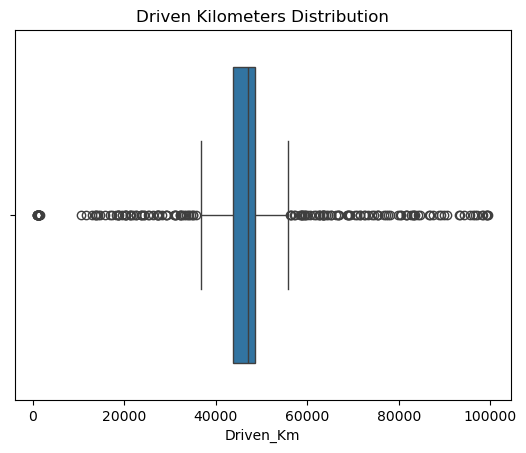

In [41]:
sns.boxplot(x=cs['Driven_Km'])
plt.title('Driven Kilometers Distribution')
plt.show()

The Boxplot Analysis shows that most of the listed on Cars24 have been driven  between 35000 km and 60000km. the range represents the majority of vahicles available in the market.

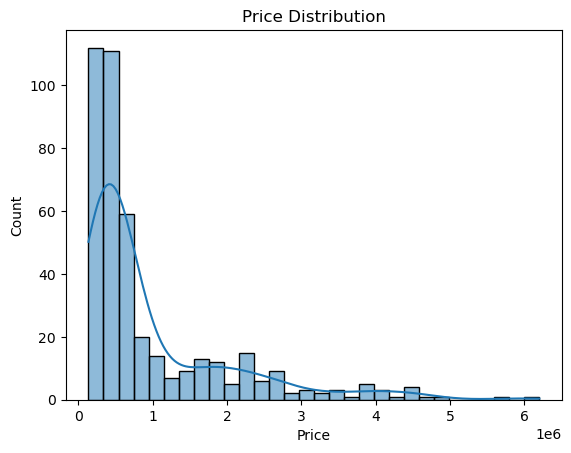

In [42]:
sns.histplot(cs['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

It  shows majority of used cars are priced below 10 lakhs ,while a smalled portion falls with the ₹10-15lakh range.and high priced vehicles are relatevely rare in the dataset.

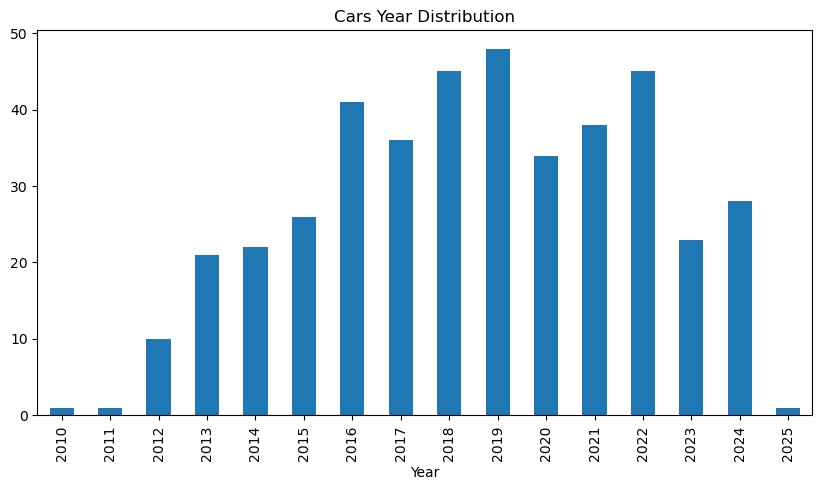

In [43]:
 plt.figure(figsize=(10,5))
cs['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Cars Year Distribution')
plt.show()

In the Bar cahrt indicated  that most of  used cars were manufactured  between 2017 and 2023.The highest concentation of listings is observed for years 
2017,2019 and 2022 . which implies  new models dominated the used car market, reflecting custemer demand for relatively recent vehicles.

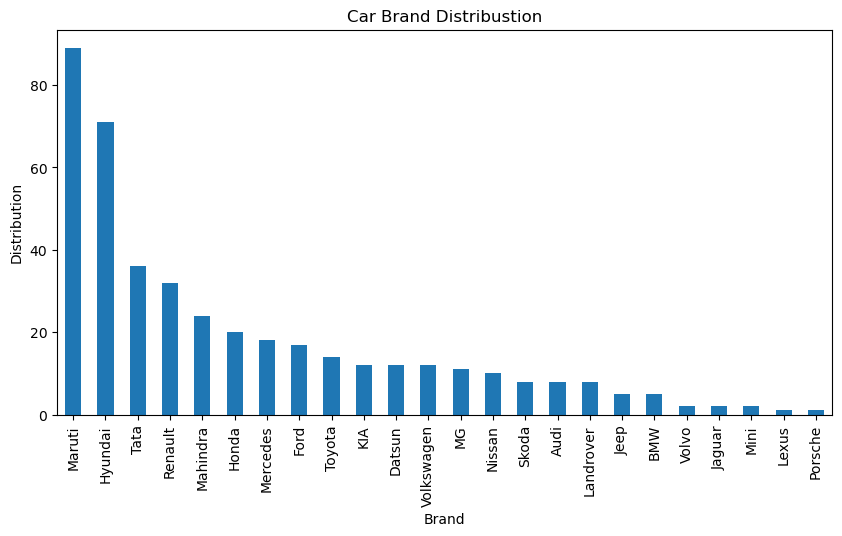

In [44]:
plt.figure(figsize=(10,5))
cs['Brand'].value_counts().plot(kind='bar')
plt.ylabel('Distribution')
plt.title('Car Brand Distribustion')
plt.show()

The Bar chart indicates the most popular car Brands among  used car listing.

• Maruti,Hyundai and tata  are the top three Brands ,showing the highest no.of used cars available.

• others comanlt listed brands include Honda,Renault, Mahendra, and Volkswagen.

• Premium Brands such as BMW,Audi,Jaguar and Porche appear in small portion.

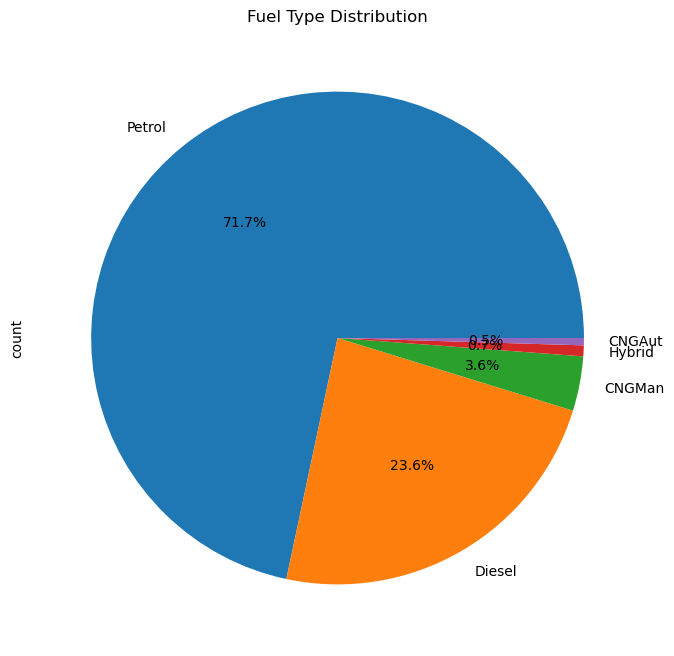

In [45]:
plt.figure(figsize=(8,8))
cs['Fuel'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Fuel Type Distribution')
plt.show()

According to pie chat ,Petrol cars are appoximately 80.5% of the total used cars available in the Cars24.Diesel cars are 15.9% , while CNG,Electric and CNGMan vehicles a small fraction.This ahows that petrol vehicles remain the most popular choice among the indan users, due to easy of maintenance.

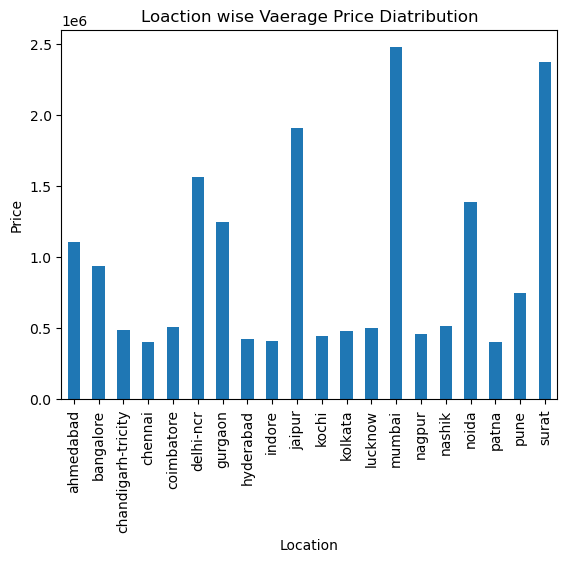

In [46]:
cs.groupby('Location')['Price'].mean().plot(kind='bar')
plt.ylabel('Price')
plt.title('Loaction wise Vaerage Price Diatribution')
plt.show()

When compared to Location wise average prices of used cars ,cities like Gurgaon,jaipur and surat show higher average prices  than the other indian cities .

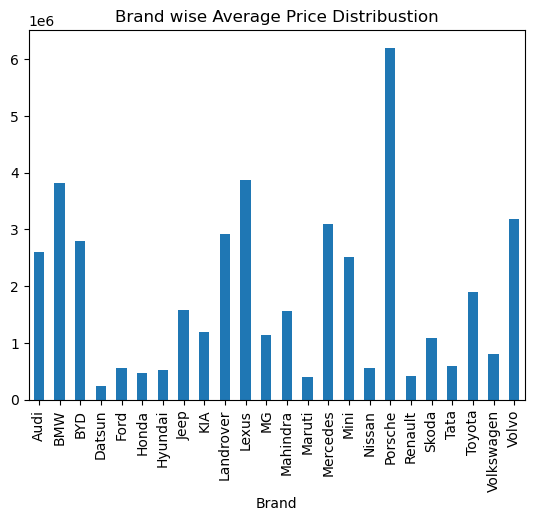

In [148]:
cs.groupby('Brand')['Price'].mean().plot(kind='bar')
plt.title('Brand wise Average Price Distribustion')
plt.show()

The Bar chart shows that luxury branda such as porche, Morcedes,BMW,and Jaguar have the highest average prices ,often exceeding ₹50lakhs.

• Budget Brands like Maruti,Hyundi, Tata and Renault have much lower average prices ,mostly below ₹10lakhs.

### Bivariate 

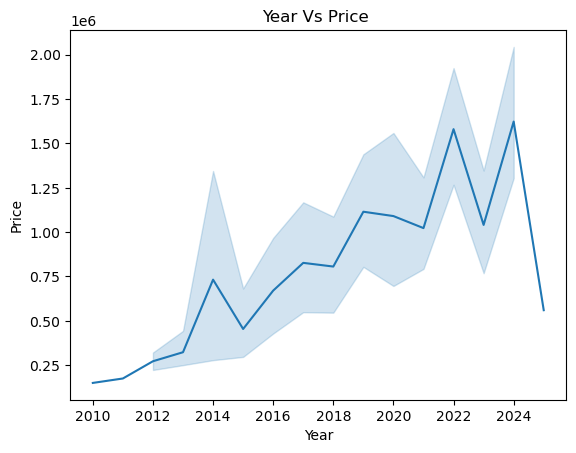

In [64]:
sns.lineplot(data=cs,x='Year',y='Price')
plt.title('Year Vs Price ')
plt.show()

The line plot shows  in average between 2010 and 2024. Newer model years  especially after 2018  shows higher average prices ,reflecting greater demand for recent cars with updated features.

• Older cars before 2015 generally have lower resale values, as expected due to wear and outdated modeles.

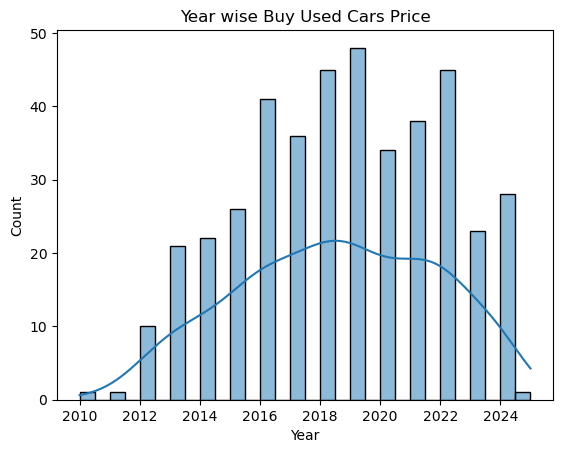

In [65]:
sns.histplot(data=cs,x='Year',kde='Price',bins=30)
plt.title('Year wise Buy Used Cars Price')
plt.show()

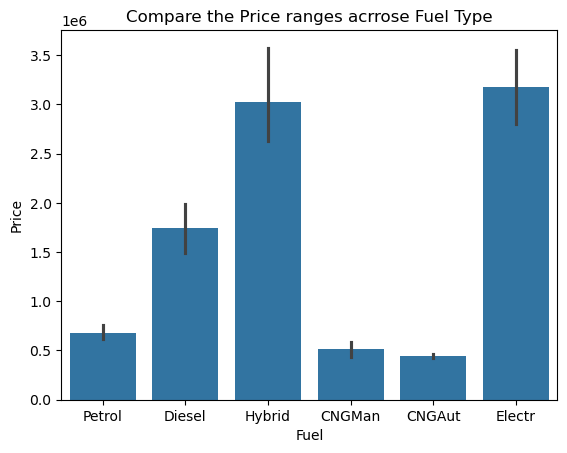

In [168]:

sns.barplot(data=cs,x='Fuel',y='Price')
plt.title('Compare the Price ranges acrrose Fuel Type')
plt.show()

In [169]:
sns.lineplot(data=cs,x='Fuel',y='Price')
plt.title('Compare the Price ranges acrrose Fuel Type')
plt.show()

 The line plot comparing fuel types indicates the Electric and Diesel cars have highest price ranges ,likely due to newer Technology and better performance. 

 petrol cars shows the moderate average Prices while CNGMan and CNGAut  vehicles are on the lower end of the price scale. It indicates the Fuel Type significantly influences car priceing, with electric and deisel vehicles commnding premium prices.

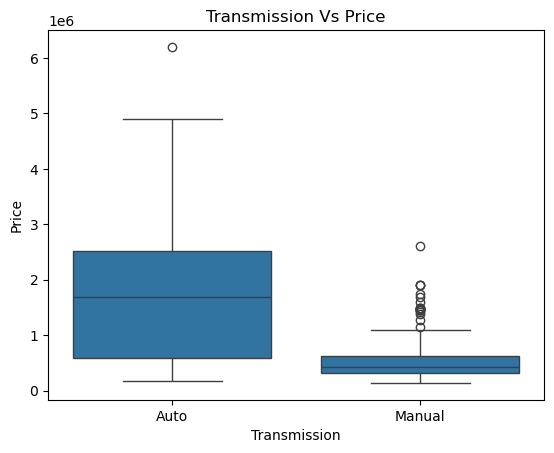

In [151]:
sns.boxplot(data=df, x='Transmission', y='Price')
plt.title('Transmission Vs Price')
plt.show()

The boxplot shows that automatic cars generally higher prices compared to the manual transmission cars.

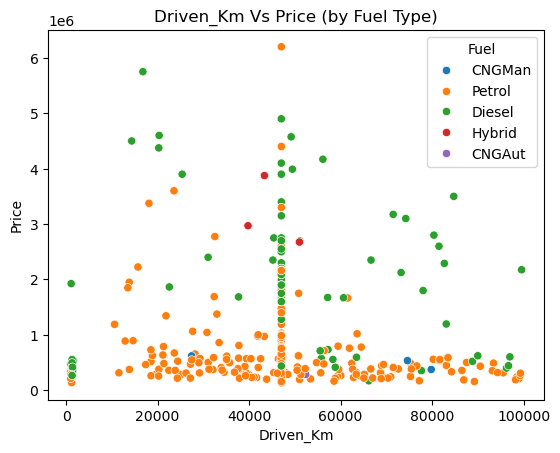

In [49]:
sns.scatterplot(data=cs,x='Driven_Km',y='Price',hue='Fuel')
plt.title('Driven_Km Vs Price (by Fuel Type)')
plt.show()

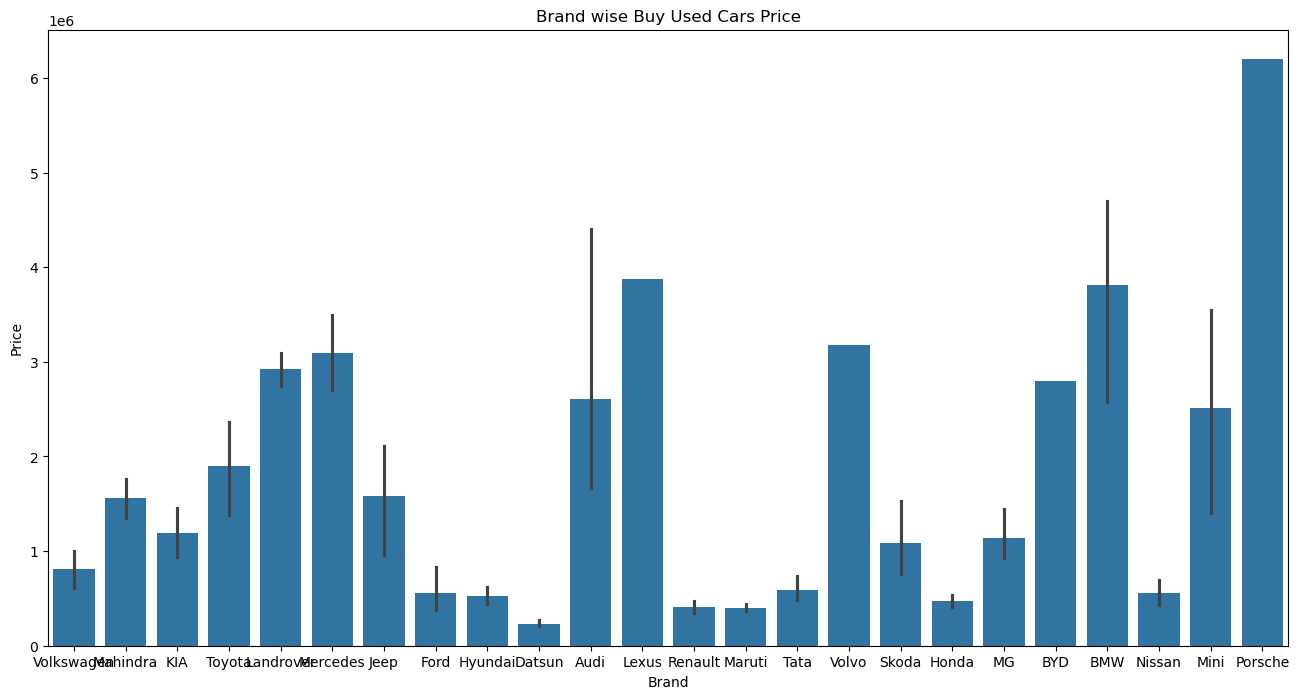

In [181]:
plt.figure(figsize=(16,8))
sns.barplot(data=cs,x='Brand',y='Price')
plt.title('Brand wise Buy Used Cars Price')
plt.show()

Year wise analysis in the sale new cars (2019-2023) showing higher price  that most in  recent model with updated features.  

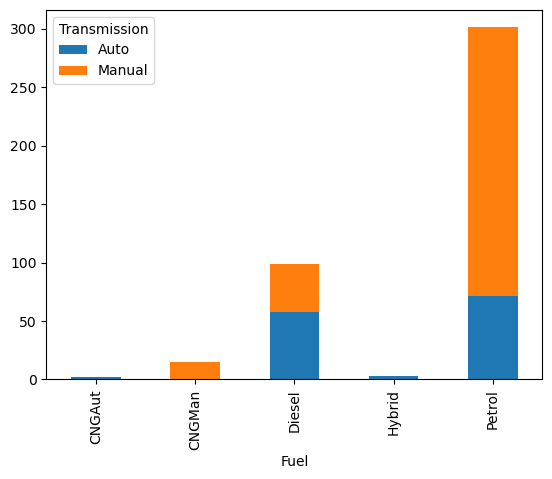

In [62]:
cross_tab=pd.crosstab(cs['Fuel'],cs['Transmission'])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Fuel Vs Transmission')

pd.crosstab(cs['Fuel'], cs['Transmission']).plot(kind='bar', stacked=True)
plt.show()



The Fuel Vs Transmission Bar chart shows that manual Transmission cars dominate  across all fual types, especially among the petrol vehicles , while automic cars are more common premium and new models.

<Axes: ylabel='Driven_Km'>

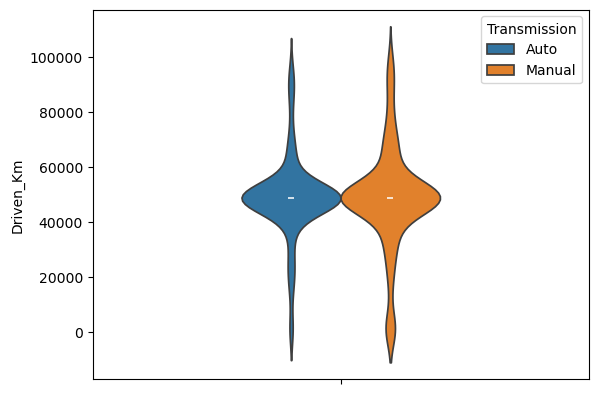

In [32]:
sns.violinplot(y='Driven_Km',data=cs,width=0.4,hue='Transmission')

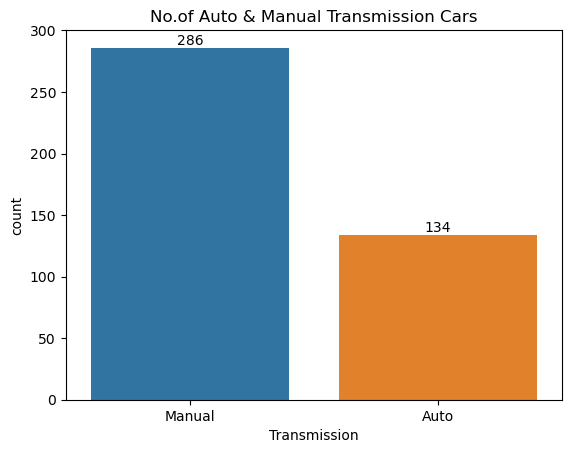

In [63]:
ax=sns.countplot(x='Transmission',data=cs,hue='Transmission')
[ax.bar_label(i) for i in ax.containers]
plt.title('No.of Auto & Manual Transmission Cars')
plt.show()

<Figure size 800x400 with 0 Axes>

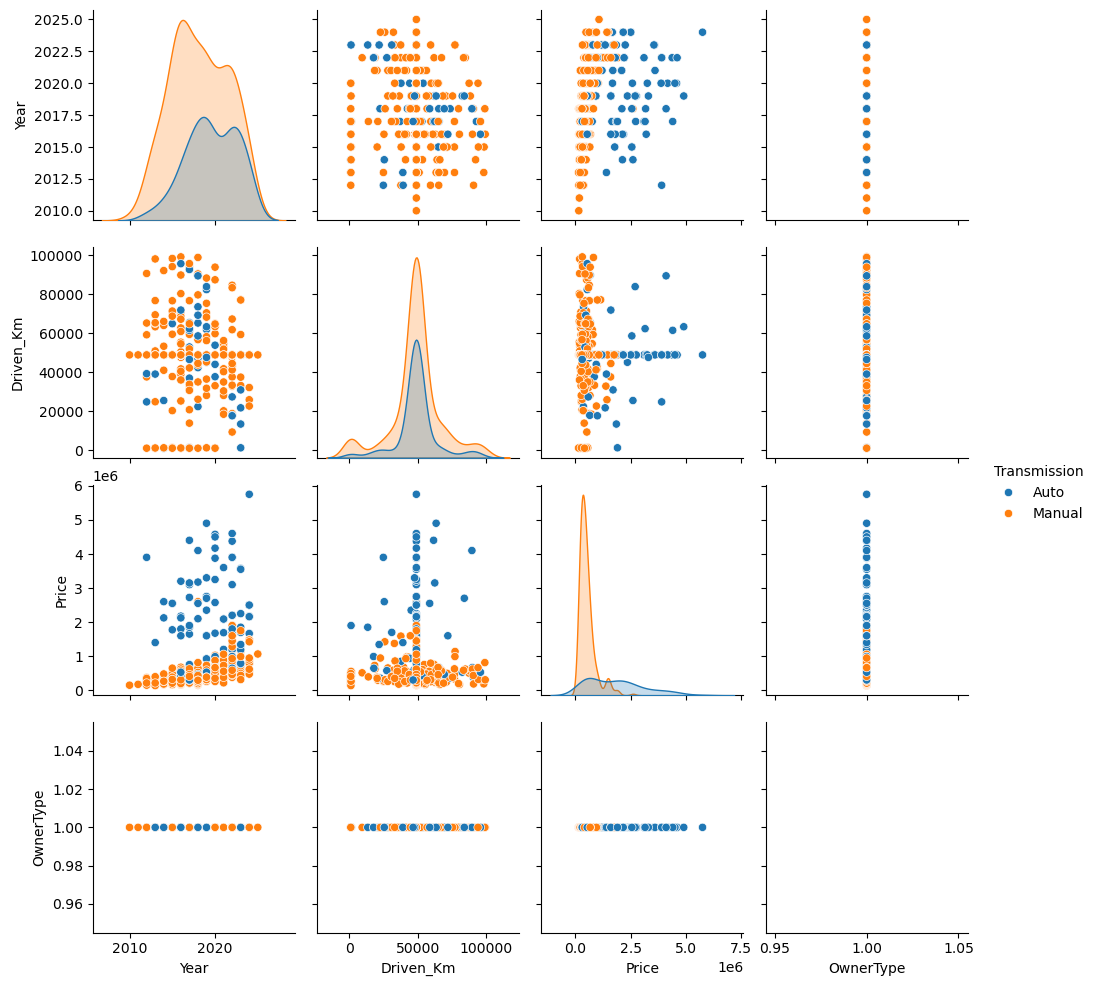

In [34]:
plt.figure(figsize=(8,4))
sns.pairplot(data=cs,hue='Transmission')

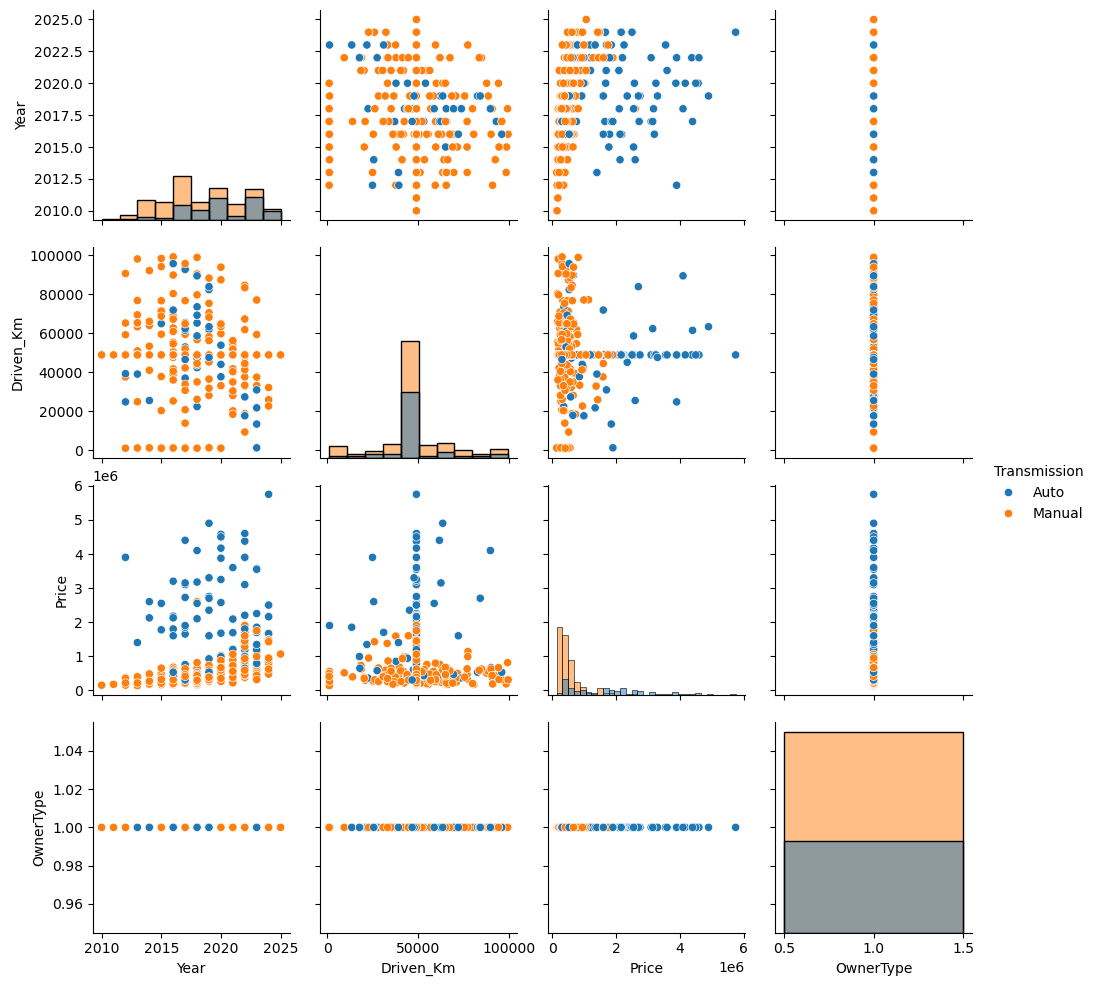

In [35]:
sns.pairplot(cs,hue='Transmission',diag_kind='hist')

In [162]:
min_year=cs['Year'].min()
print(min_year)
max_year=cs['Year'].max()
print(max_year)
avg_price=(cs['Price'].mean())
print(avg_price)
avg_km=cs['Driven_Km'].mean()
print(avg_km)

2010
2025
919421.3785714286
45103.3


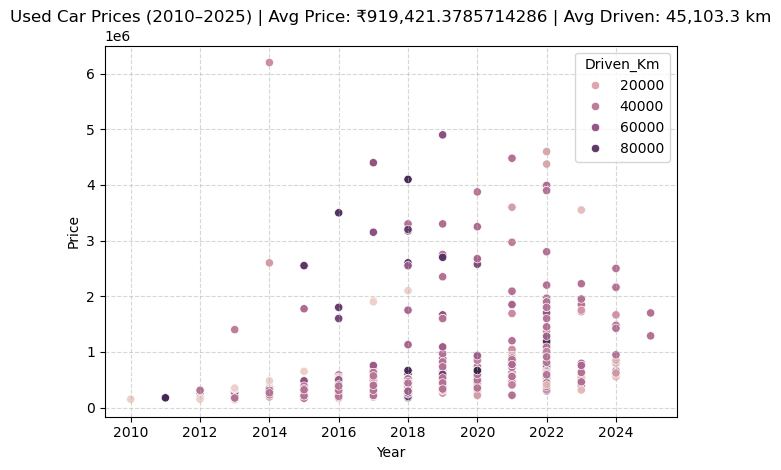

In [163]:
sns.scatterplot(data=cs,x='Year',y='Price',hue='Driven_Km',color='red')
plt.title(f'Used Car Prices ({min_year}–{max_year}) | Avg Price: ₹{avg_price:,} | Avg Driven: {avg_km:,} km')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
